Data importing

In [1]:
import yfinance as yf
import numpy as np

# Example: Pull stock data for Apple (AAPL) for the last year
stock_data = yf.download('AAPL', period='1y', interval='1d')


[*********************100%***********************]  1 of 1 completed


Data interpretation

In [2]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-11-20 00:00:00+00:00 to 2024-11-19 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  252 non-null    float64
 1   (Close, AAPL)      252 non-null    float64
 2   (High, AAPL)       252 non-null    float64
 3   (Low, AAPL)        252 non-null    float64
 4   (Open, AAPL)       252 non-null    float64
 5   (Volume, AAPL)     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [3]:
stock_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,200.894359,201.434841,203.106508,199.573889,201.294682,5.748536e+07
std,21.870751,21.697398,21.894827,21.335829,21.656542,3.037399e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,183.452492,184.224998,185.134995,182.204998,183.827499,4.218562e+07
50%,193.745834,194.489998,196.130005,193.544998,194.834999,5.013555e+07
75%,223.510101,224.015003,225.769997,221.714996,224.317501,6.372982e+07
max,236.220108,236.479996,237.490005,234.449997,236.479996,3.186799e+08


Data cleaning

In [4]:
# Check for missing values
stock_data.isnull().sum()

# Check for duplicates
stock_data.duplicated().sum()

# Drop duplicates if any
stock_data = stock_data.drop_duplicates()


Data visualization

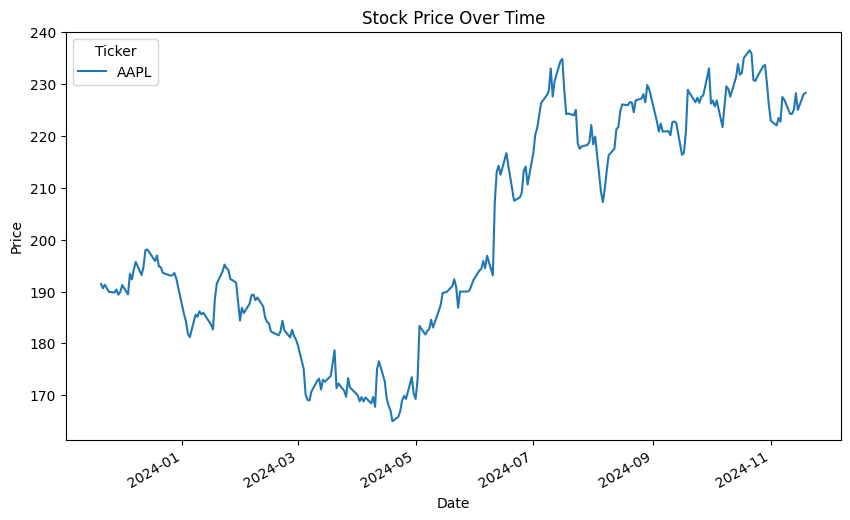

In [5]:
import matplotlib.pyplot as plt

stock_data['Close'].plot(title='Stock Price Over Time', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

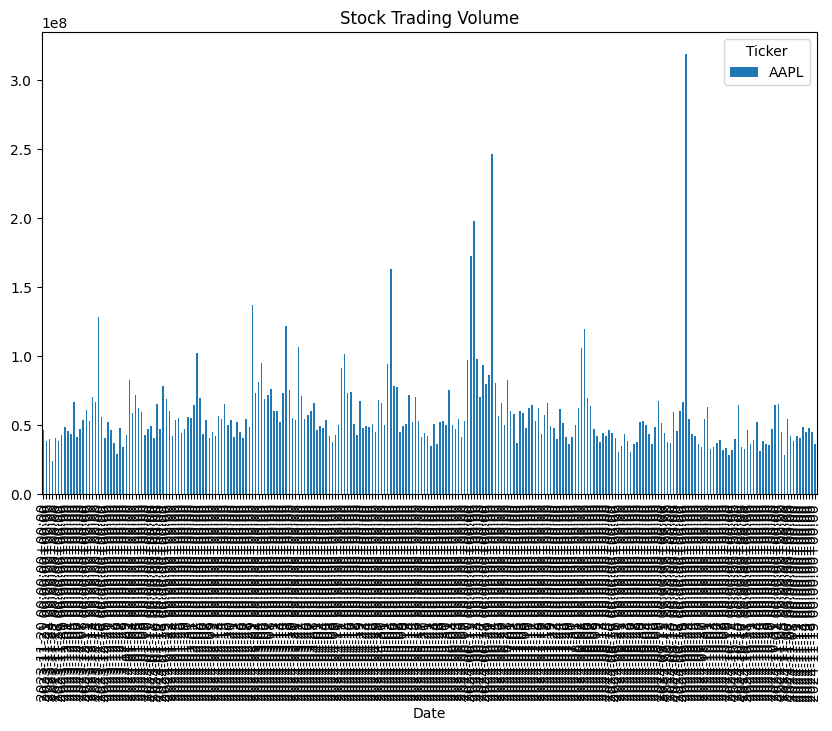

In [6]:
stock_data['Volume'].plot(kind='bar', figsize=(10, 6))
plt.title('Stock Trading Volume')
plt.show()


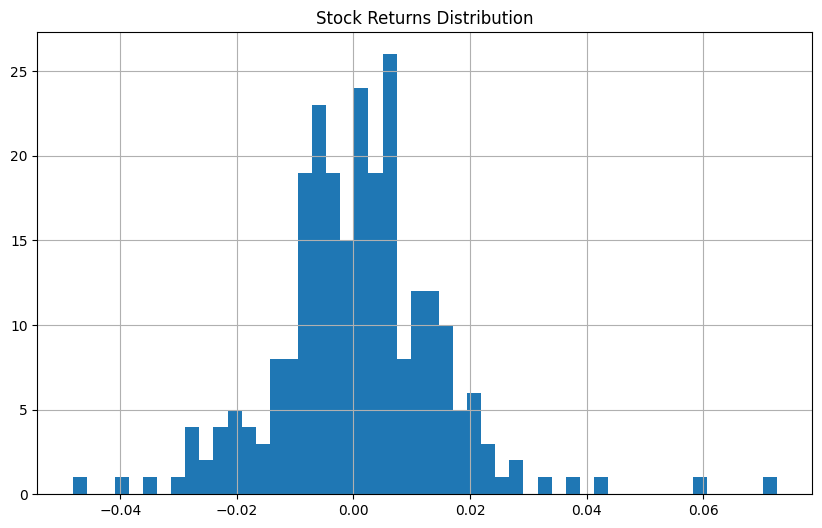

In [7]:
stock_data['Returns'] = stock_data['Close'].pct_change()
stock_data['Returns'].hist(bins=50, figsize=(10, 6))
plt.title('Stock Returns Distribution')
plt.show()


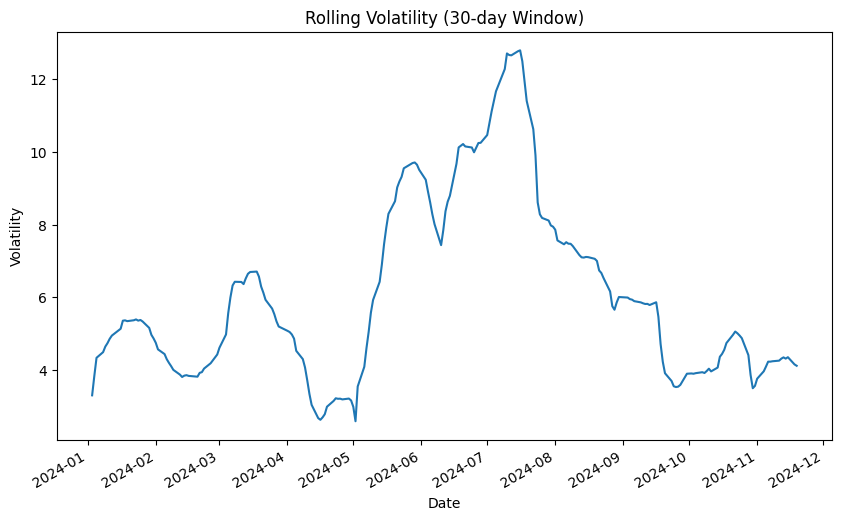

In [8]:
# Calculate rolling standard deviation (volatility) for a 30-day window
stock_data['Volatility'] = stock_data['Close'].rolling(window=30).std()

# Plot the volatility
stock_data['Volatility'].plot(figsize=(10, 6), title='Rolling Volatility (30-day Window)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


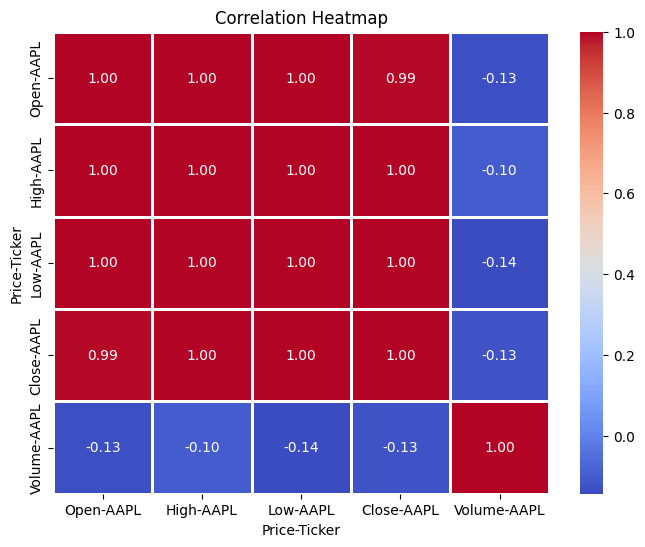

In [9]:
import seaborn as sns

# Plot the correlation matrix
corr_matrix = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()


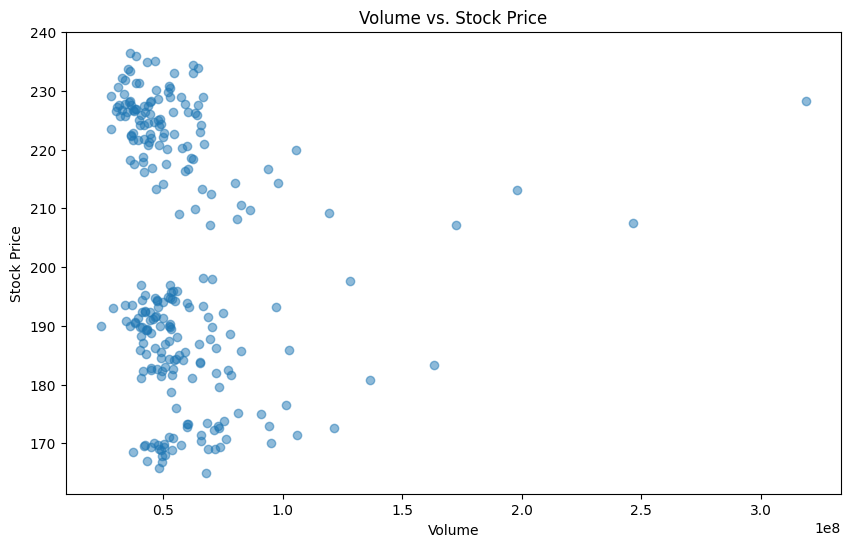

In [10]:
# Plot volume against stock price
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Volume'], stock_data['Close'], alpha=0.5)
plt.title('Volume vs. Stock Price')
plt.xlabel('Volume')
plt.ylabel('Stock Price')
plt.show()


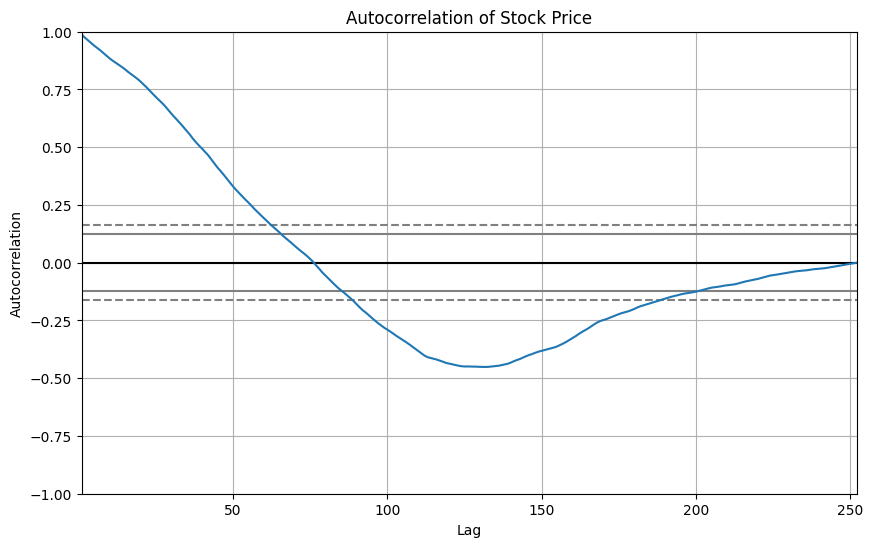

In [11]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot of closing prices
plt.figure(figsize=(10, 6))
autocorrelation_plot(stock_data['Close'])
plt.title('Autocorrelation of Stock Price')
plt.show()


Model Building

Model1: Long-Short term memory(LSTM)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3539
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0463
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0279
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0246
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0222
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0135
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0151
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0128
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0140
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0114


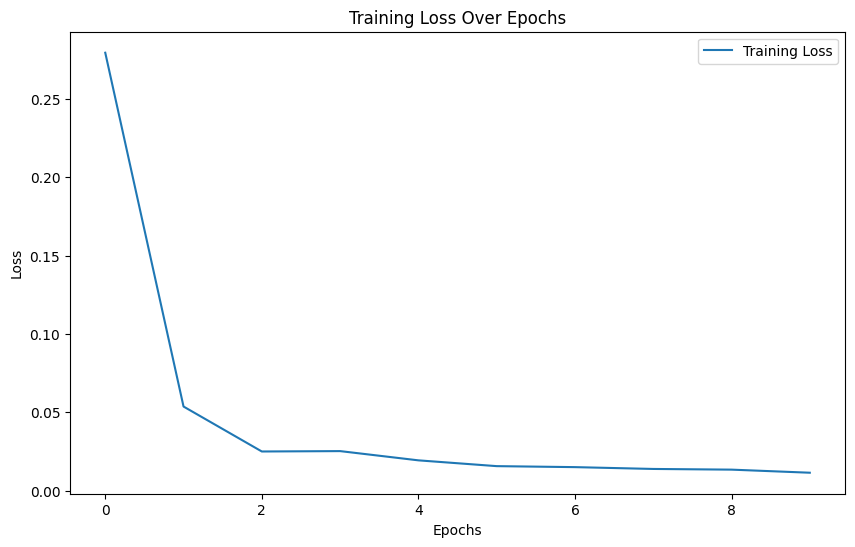

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


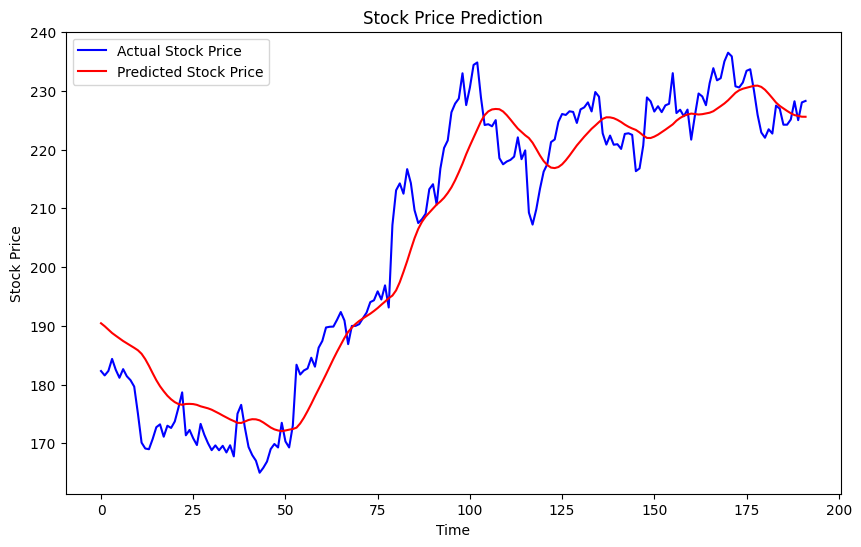

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Normalize the stock data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

# Prepare the data for LSTM
X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])  # Last 60 days of data
    y.append(scaled_data[i, 0])  # Next day's price

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshaping for LSTM input

# LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict next day's price

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store the history to plot later
history = model.fit(X, y, epochs=10, batch_size=32)

# Plot the training loss over epochs
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the training data
predicted_stock_price = model.predict(X)

# Invert scaling to get the actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the predicted vs actual prices
plt.figure(figsize=(10,6))
plt.plot(actual_stock_price, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Model2: RandomForestRegressor

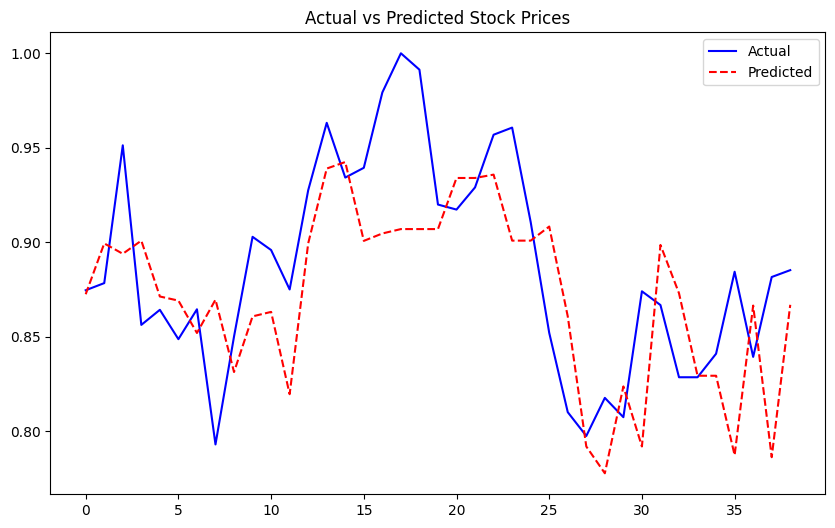

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_2D = X[:, -1, 0]

X_2D = X_2D.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, shuffle=False)

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', linestyle='--', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()